<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCIÓN NUMÉRICA DE LA ECUACIÓN DEL CALOR
## Método de Richardson para Ecuaciones Diferenciales Parciales

**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación del calor:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

con condiciones:

- **Condiciones de frontera:** $u(0,t) = u(1,t) = 0$ (Dirichlet)
- **Condición inicial:** $u(x,0) = \sin(\pi x)$
- **Dominio:** $0 \leq x \leq 1$, $t \geq 0$

**Método:** Discretización implícita usando el método de Richardson

In [1]:
import sympy as sp  # Algebra simbólica para resolver sistemas lineales
import numpy as np  # Arrays y operaciones numéricas eficientes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para proyección 3D
from matplotlib import cm  # Mapas de color para visualización
from matplotlib.animation import FuncAnimation, PillowWriter  # Animaciones

In [3]:
def f(x):
    """Condición inicial u(x,0) = sin(πx)"""
    return np.sin(np.pi * x)

In [4]:
def crear_matriz_A(n):
    """
    EJERCICIO 1: Matriz tridiagonal usando numpy
    Sintaxis Python no obvia:
    - np.zeros((n,n)): crea matriz n×n llena de ceros
    - A[i,i] = 3: asigna valor a diagonal principal
    - A[i,i-1] y A[i,i+1]: asignan a sub/super diagonales
    - sp.Matrix(A): convierte array numpy a matriz sympy para resolver sistema
    """
    A = np.zeros((n, n))  # Inicializar con ceros

    for i in range(n):
        A[i, i] = 3
        if i > 0:
            A[i, i-1] = -1  # Subdiagonal
        if i < n-1:
            A[i, i+1] = -1  # Superdiagonal

    return sp.Matrix(A)  # Convertir a matriz sympy para resolver

In [5]:
n = 9
# Comprensión de lista: [f(x) for x in x_points] crea lista aplicando f a cada x
x_points = [i * 0.1 for i in range(1, n + 1)]  # [0.1, 0.2, ..., 0.9]

b = sp.Matrix([f(x) for x in x_points])  # Vector b con condición inicial

A = crear_matriz_A(n)

In [6]:
def richardson(A, b, j_max):
    """
    EJERCICIO 3
    - b.copy(): crea copia para no modificar original
    - np.array(b_actual, dtype=float).flatten(): convierte matriz sympy a array numpy 1D
    - A.LUsolve(b_actual): resuelve sistema usando factorización LU (más eficiente)
    """
    S = []
    b_actual = b.copy()  # Copiar para no alterar b original

    # Bucle for con range(j_max + 1): incluye desde 0 hasta j_max
    for j in range(j_max + 1):
        # Convertir a array numpy y aplanar a 1D
        S.append(np.array(b_actual, dtype=float).flatten())

        # Resolver sistema: A * siguiente = actual
        sol = A.LUsolve(b_actual)
        b_actual = sol  # Actualizar para siguiente iteración

    return np.array(S)  # Convertir lista de arrays a matriz numpy


In [7]:
j_max = 20
U = richardson(A, b, j_max)

# np.linspace: crea array con valores espaciados uniformemente
x = np.linspace(0.1, 0.9, 9)  # 9 puntos entre 0.1 y 0.9
t = np.linspace(0, 0.2, j_max + 1)  # j_max+1 puntos temporales

# np.meshgrid: crea matrices de coordenadas para gráficas 3D
X, T = np.meshgrid(x, t)  # X repite x para cada t, T repite t para cada x


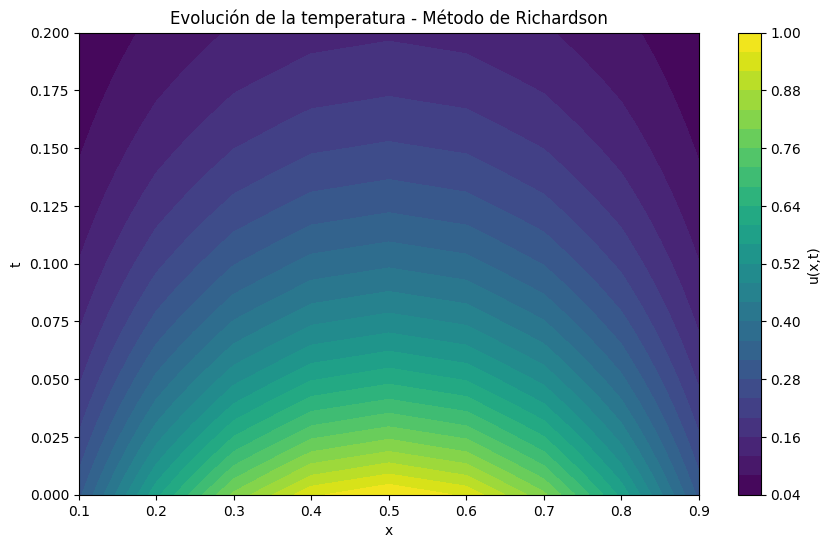

In [10]:
# Gráfica 2D de contorno
plt.figure(figsize=(10, 6))
# contourf: gráfica de contorno rellena
contour = plt.contourf(X, T, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour, label='u(x,t)')
plt.title('Evolución de la temperatura - Método de Richardson')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

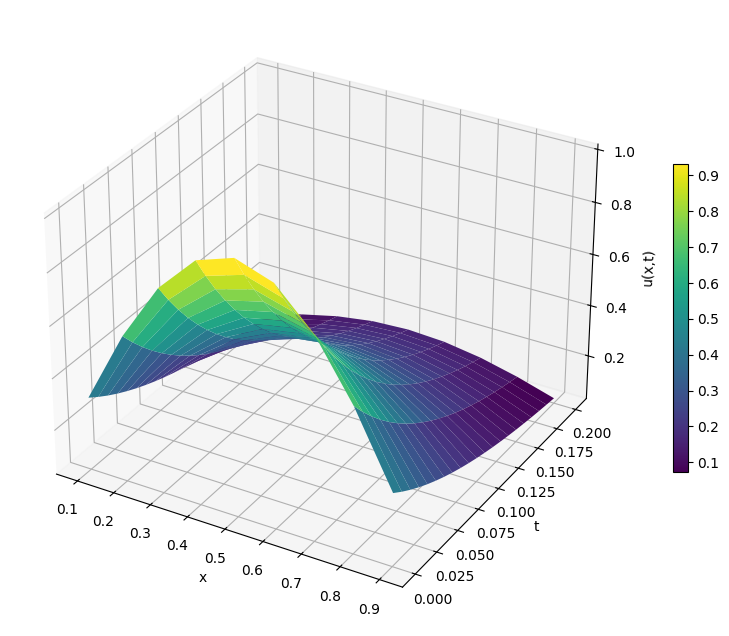

In [11]:
# Gráfica 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # 111 = 1 fila, 1 col, subplot 1
# plot_surface: superficie 3D
surf = ax.plot_surface(X, T, U, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
fig.colorbar(surf, shrink=0.5, aspect=20)  # shrink ajusta tamaño colorbar
plt.show()

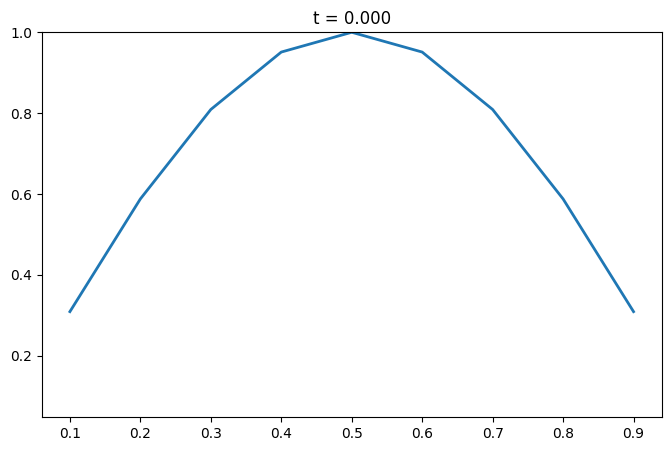

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))

def update(k):
    """Función que actualiza la animación en cada frame"""
    line.set_ydata(U[k])  # Actualizar datos Y
    ax.set_title(f't = {t[k]:.3f}')  # Actualizar título
    return line,  # Tupla con elementos a actualizar

# FuncAnimation: crea animación llamando update() para cada frame
anim = FuncAnimation(fig, update, frames=len(t), interval=200, blit=True)
plt.show()

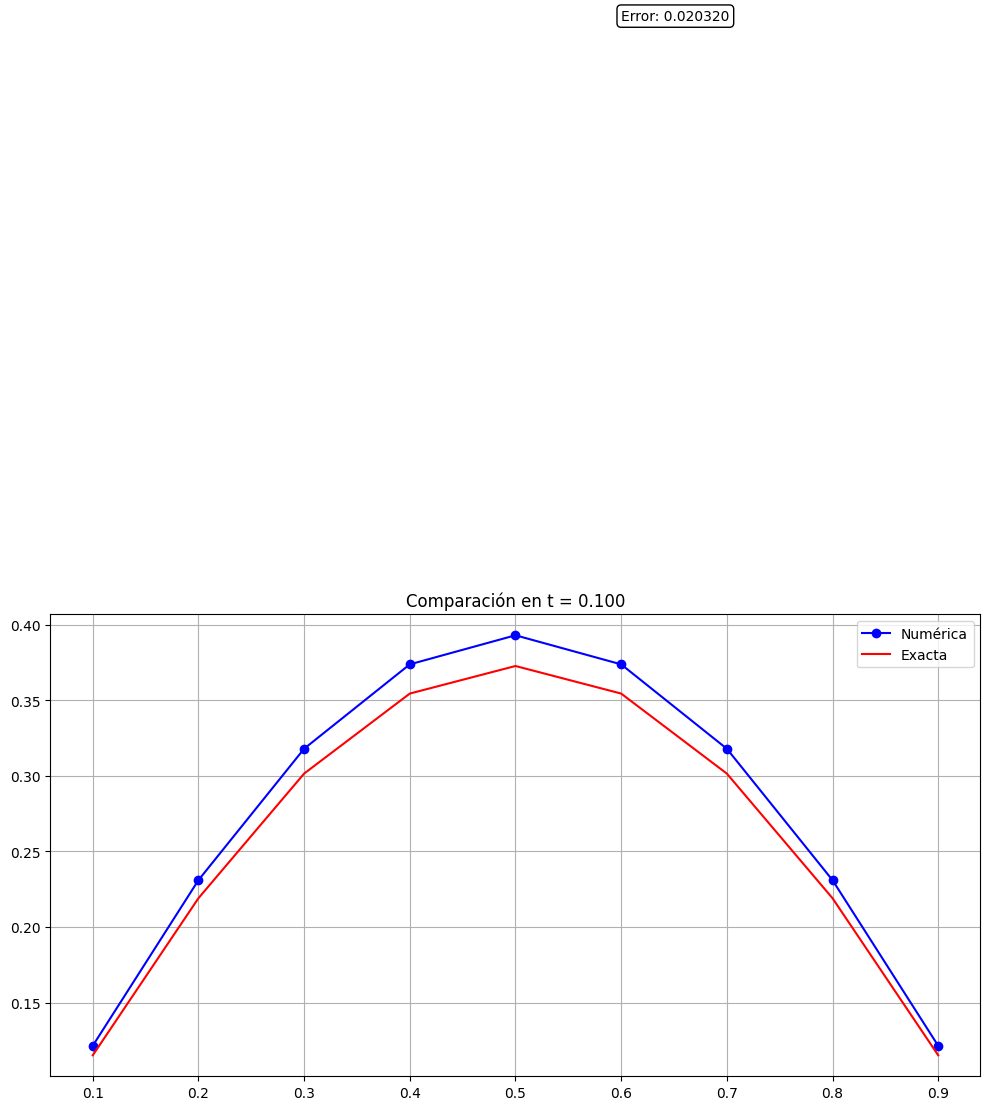

Error máximo: 0.020320


In [13]:
def solucion_exacta(x, t, alpha=1):
    """Solución analítica u(x,t) = e^(-π²t)·sin(πx)"""
    return np.exp(-alpha**2 * np.pi**2 * t) * np.sin(np.pi * x)

t_comparacion = 0.1
# np.argmin: encuentra índice del valor más cercano
indice_tiempo = np.argmin(np.abs(t - t_comparacion))
t_real = t[indice_tiempo]

u_numerica = U[indice_tiempo, :]
u_exacta = solucion_exacta(x, t_real)

# Gráfica comparativa
plt.figure(figsize=(12, 6))
plt.plot(x, u_numerica, 'bo-', label='Numérica')
plt.plot(x, u_exacta, 'r-', label='Exacta')
plt.title(f'Comparación en t = {t_real:.3f}')
plt.legend()
plt.grid(True)

# np.max y np.abs: operaciones vectorizadas en arrays
error_maximo = np.max(np.abs(u_numerica - u_exacta))
plt.text(0.6, 0.8, f'Error: {error_maximo:.6f}',
         bbox=dict(boxstyle="round", facecolor="white"))
plt.show()

print(f"Error máximo: {error_maximo:.6f}")

In [19]:
print("EJERCICIO 5: Simplificación del sistema (matriz tridiagonal)")

# La matriz A es tridiagonal, por lo que podemos usar algoritmos eficientes.
# En lugar de resolver con métodos generales, usamos matrices dispersas.

from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def resolver_eficiente(n, b, j_max):
    """Resuelve el sistema usando matrices dispersas (más eficiente)"""
    # Crear matriz dispersa tridiagonal
    diagonales = [-1, 3, -1]
    A_sparse = diags(diagonales, [-1, 0, 1], shape=(n, n))

    b_array = np.array(b, dtype=float).flatten()
    S = [b_array.copy()]
    u_actual = b_array.copy()

    for i in range(j_max):
        u_siguiente = spsolve(A_sparse, u_actual)
        S.append(u_siguiente)
        u_actual = u_siguiente

    return np.array(S)

# Comparamos los resultados con el método original
U_eficiente = resolver_eficiente(n, b, j_max)
diferencia = np.max(np.abs(U - U_eficiente))
print(f"Diferencia entre métodos: {diferencia:.2e}")

print("Conclusión: Para matrices tridiagonales, es más eficiente usar métodos especializados.")

EJERCICIO 5: Simplificación del sistema (matriz tridiagonal)
Diferencia entre métodos: 2.22e-16
Conclusión: Para matrices tridiagonales, es más eficiente usar métodos especializados.


/tmp/ipython-input-1919053520.py:20: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  u_siguiente = spsolve(A_sparse, u_actual)


EJERCICIO 6: Problema de precisión por uso de pocos puntos espaciales
h actual = 0.1, error ~ O(h²) = 0.0100


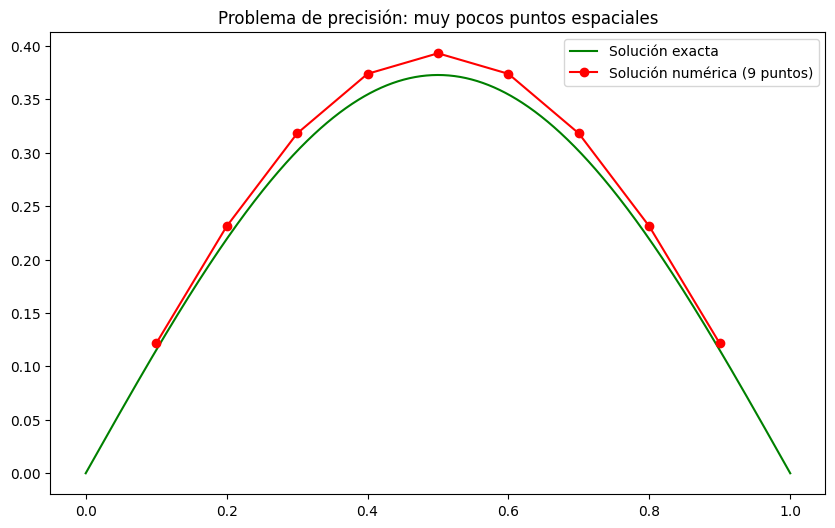

Error máximo con 9 puntos: 0.114169
Con h=0.01, error esperado ~ 0.000100
Conclusión: Se necesitan más puntos espaciales para mejorar la precisión.


In [17]:
print("EJERCICIO 6: Problema de precisión por uso de pocos puntos espaciales")

# El error de discretización espacial es O(h²). Con h=0.1, el error es del orden de 0.01.

h_actual = 0.1
print(f"h actual = {h_actual}, error ~ O(h²) = {h_actual**2:.4f}")

# Mostramos la solución exacta y la numérica en un gráfico
x_continuo = np.linspace(0, 1, 1000)
u_exacta_continua = solucion_exacta(x_continuo, 0.1)

plt.figure(figsize=(10, 6))
plt.plot(x_continuo, u_exacta_continua, 'g-', label='Solución exacta')
plt.plot(x, U[10], 'ro-', label='Solución numérica (9 puntos)')
plt.title('Problema de precisión: muy pocos puntos espaciales')
plt.legend()
plt.show()

# Calculamos el error interpolando la solución numérica en los puntos de la solución exacta
from scipy.interpolate import interp1d

interpolador = interp1d(x, U[10], kind='cubic', bounds_error=False, fill_value=0)
u_numerica_interp = interpolador(x_continuo)
error = np.abs(u_exacta_continua - u_numerica_interp)
error_maximo = np.max(error)

print(f"Error máximo con 9 puntos: {error_maximo:.6f}")

# ¿Cómo mejorar? Reduciendo h
h_propuesto = 0.01
error_esperado = h_propuesto**2
print(f"Con h={h_propuesto}, error esperado ~ {error_esperado:.6f}")

print("Conclusión: Se necesitan más puntos espaciales para mejorar la precisión.")